### Setup

In [ ]:
import sys
!{sys.executable} -m pip install geopandas

     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 6.3 MB 38.4 MB/s 
     |████████████████████████████████| 16.7 MB 367 kB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import plotly.express as px
import plotly.graph_objs as go
from matplotlib.pyplot import figure
from matplotlib.animation import FuncAnimation
from matplotlib.widgets import Slider, Button
import folium
import datetime

Import data
Data can be found [here](https://acleddata.com/curated-data-files/) (need an account and key).

In [ ]:

df = pd.read_excel('/content/Sudan.xlsx', sheet_name=0)


Check column names.

In [ ]:
df.columns

Index(['ISO', 'EVENT_ID_CNTY', 'EVENT_ID_NO_CNTY', 'EVENT_DATE', 'YEAR',
       'TIME_PRECISION', 'EVENT_TYPE', 'SUB_EVENT_TYPE', 'ACTOR1',
       'ASSOC_ACTOR_1', 'INTER1', 'ACTOR2', 'ASSOC_ACTOR_2', 'INTER2',
       'INTERACTION', 'REGION', 'COUNTRY', 'ADMIN1', 'ADMIN2', 'ADMIN3',
       'LOCATION', 'LATITUDE', 'LONGITUDE', 'GEO_PRECISION', 'SOURCE',
       'SOURCE_SCALE', 'NOTES', 'FATALITIES', 'TIMESTAMP'],
      dtype='object')

Drop unnecessary columns

In [ ]:
labels_to_drop = ['ISO','TIME_PRECISION','ADMIN3','GEO_PRECISION','SOURCE','SOURCE_SCALE','TIMESTAMP']
df = df.drop(labels_to_drop, axis=1)
df.columns

Index(['EVENT_ID_CNTY', 'EVENT_ID_NO_CNTY', 'EVENT_DATE', 'YEAR', 'EVENT_TYPE',
       'SUB_EVENT_TYPE', 'ACTOR1', 'ASSOC_ACTOR_1', 'INTER1', 'ACTOR2',
       'ASSOC_ACTOR_2', 'INTER2', 'INTERACTION', 'REGION', 'COUNTRY', 'ADMIN1',
       'ADMIN2', 'LOCATION', 'LATITUDE', 'LONGITUDE', 'NOTES', 'FATALITIES'],
      dtype='object')

### Year

This dataset contains political violence in Sudan from 1997 to 2022.Subset data after South Sudan's independence on July 9, 2011.

In [ ]:
df_2 = df[df['EVENT_DATE']>='2011-07-10']

In [ ]:
len(df_2['ADMIN1'].unique())

19

Group by year and calculate the number of cases and fatalities.

In [ ]:
year_agg = df_2.groupby(['YEAR']) \
       .agg({'EVENT_ID_CNTY':'size', 'FATALITIES': 'sum'}) \
       .reset_index()

Text(0.5, 1.0, 'Conflict Cases over Year')

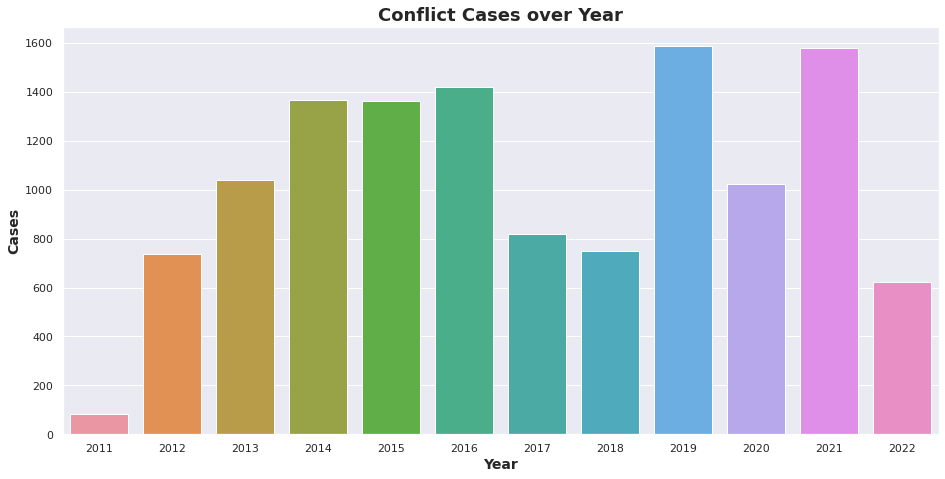

In [ ]:
pal = sns.color_palette("Blues", len(year_agg))
rank = year_agg['EVENT_ID_CNTY'].argsort().argsort()

sns.set(rc={'figure.figsize':(15.7,7.5)})
sns.barplot(x='YEAR', y = 'EVENT_ID_CNTY', data=year_agg)
plt.xlabel('Year', weight = 'bold', fontsize = 14)
plt.ylabel('Cases', weight = 'bold', fontsize = 14)
plt.title('Conflict Cases over Year', fontsize=18,weight='bold')

The number of reports significantly increase after 2011 and four times larger in 2019 and 2021.

### Event Type

In [ ]:
print(df['EVENT_TYPE'].unique())

['Battles' 'Protests' 'Violence against civilians' 'Riots'
 'Explosions/Remote violence' 'Strategic developments']


The events are classfied into 'Battles', 'Protests', 'Violence against civilians', 'Riots', 'Explosions/Remote violence', and 'Strategic developments.'

Text(0.5, 1.0, 'Cases by Event Type')

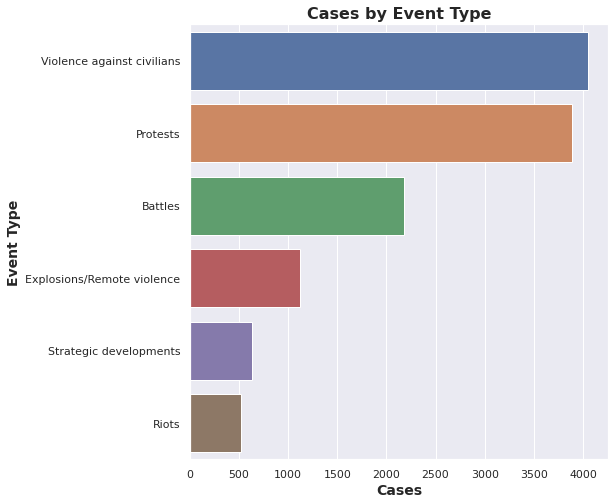

In [ ]:
sns.set(rc={'figure.figsize':(7.5,8)})
sns.countplot(y='EVENT_TYPE', data=df_2,order=df_2['EVENT_TYPE'].value_counts().index)
plt.xlabel('Cases', weight = 'bold', fontsize = 14)
plt.ylabel('Event Type', weight = 'bold', fontsize = 14)
plt.title('Cases by Event Type', fontsize=16, weight = 'bold')

Violence against civilians is the most common event followed by battles and protest. 

In [ ]:
type_agg = df_2.groupby(['EVENT_TYPE']) \
       .agg({'EVENT_ID_CNTY':'size', 'FATALITIES': 'sum'}) \
       .reset_index() \
       .sort_values(by = 'EVENT_ID_CNTY', ascending=False)
type_agg

,EVENT_TYPE,EVENT_ID_CNTY,FATALITIES
5,Violence against civilians,4055,4680
2,Protests,3893,433
0,Battles,2174,19821
1,Explosions/Remote violence,1118,1677
4,Strategic developments,628,3
3,Riots,518,413


Pie chart showing the proportion of each event type.

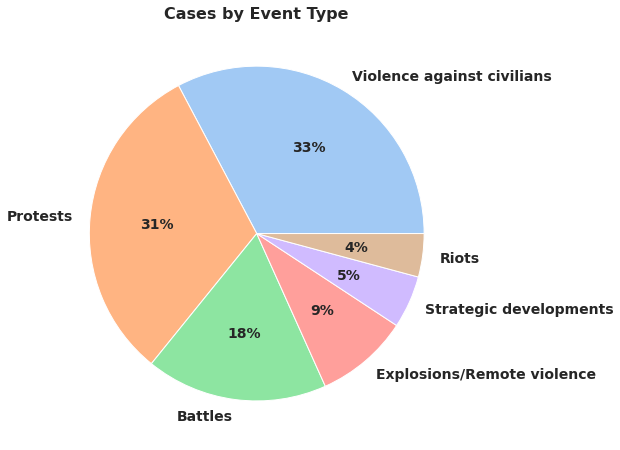

In [ ]:
colors = sns.color_palette('pastel')
plt.rcParams.update({'font.size': 14})
plt.pie(type_agg['EVENT_ID_CNTY'],labels = type_agg['EVENT_TYPE'],colors = colors,autopct = '%0.0f%%',textprops={'fontsize': 14, 'fontweight':'bold'})
plt.title('Cases by Event Type', fontsize = 16, weight = 'bold')
plt.show()

Violence against Civilians and Protests are the majority, taking up two thirds.

In [ ]:
type_agg = df_2.groupby(['EVENT_TYPE','YEAR']) \
       .agg({'EVENT_ID_CNTY':'size', 'FATALITIES': 'sum'}) \
       .reset_index()
type_agg

,EVENT_TYPE,YEAR,EVENT_ID_CNTY,FATALITIES
0,Battles,2011,43,309
1,Battles,2012,181,1906
2,Battles,2013,319,5595
3,Battles,2014,269,3049
4,Battles,2015,305,2443
...,...,...,...,...
67,Violence against civilians,2018,296,289
68,Violence against civilians,2019,262,222
69,Violence against civilians,2020,254,345
70,Violence against civilians,2021,402,519


Text(0.5, 1.0, 'Cases by Event Type over Years')

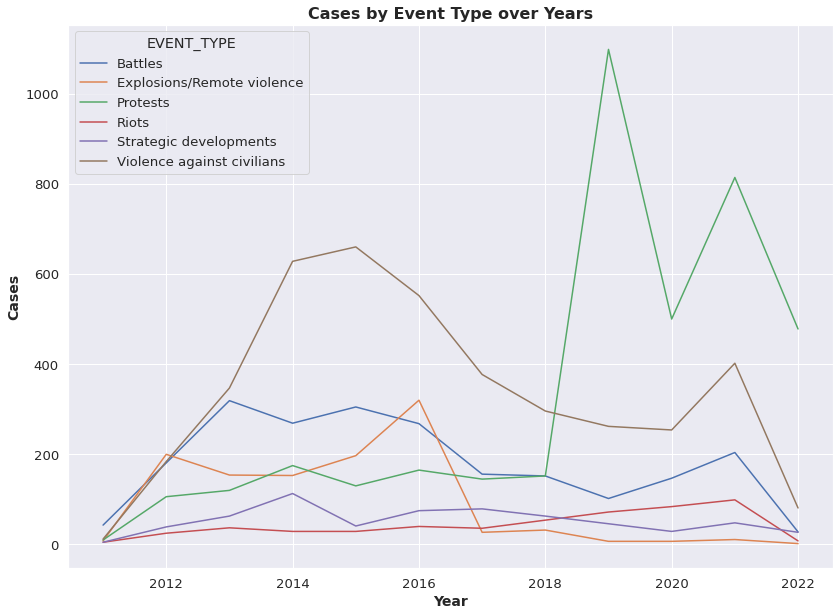

In [ ]:
sns.set(rc={'figure.figsize':(13.7,10)},font_scale=1.2)
sns.lineplot(data=type_agg, x='YEAR', y='EVENT_ID_CNTY', hue = 'EVENT_TYPE')
plt.xlabel('Year', weight = 'bold', fontsize = 14)
plt.ylabel('Cases', weight = 'bold', fontsize = 14)
plt.title('Cases by Event Type over Years', fontsize=16, weight = 'bold')

The protest cases significantly increase in 2019, which is attributed to political instability. 

###ADMIN1 - State level

In [ ]:
print(df['ADMIN1'].unique())

['Red Sea' 'Kassala' 'Khartoum' 'West Darfur' 'Blue Nile' 'Upper Nile'
 'Sennar' 'Equatoria' 'South Kordofan' 'Al Jazirah' 'Bahr el Ghazal'
 'River Nile' 'West Kordofan' 'Gedaref' 'North Kordofan' 'Abyei'
 'Central Darfur' 'South Darfur' 'White Nile' 'Northern' 'North Darfur'
 'East Darfur']


Text(0.5, 1.0, 'Cases by State')

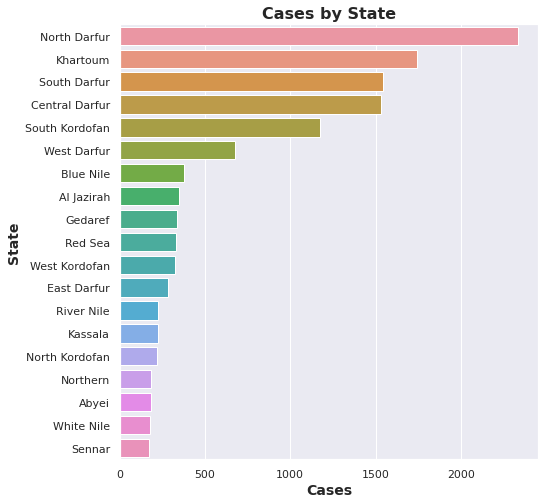

In [ ]:
sns.set(rc={'figure.figsize':(7.5,8)})
sns.countplot(y='ADMIN1', data=df_2, order=df_2['ADMIN1'].value_counts().index)
plt.xlabel('Cases', weight = 'bold', fontsize = 14)
plt.ylabel('State', weight = 'bold', fontsize = 14)
plt.title('Cases by State', fontsize=16, weight = 'bold')

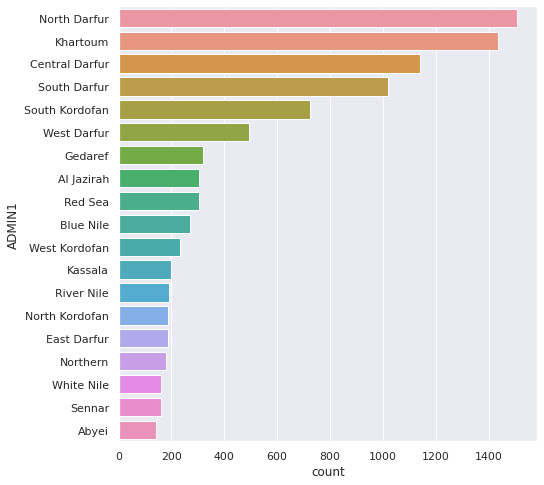

In [ ]:
sns.countplot(y='ADMIN1', data=df.loc[df['YEAR'] >=2015], order=df.loc[df['YEAR'] >=2015]['ADMIN1'].value_counts().index)

In [ ]:
agg_fatal = df_2.groupby(['ADMIN1']) \
       .agg({'FATALITIES': 'sum'}) \
       .reset_index()
agg_fatal

,ADMIN1,FATALITIES
0,Abyei,625
1,Al Jazirah,165
2,Blue Nile,1685
3,Central Darfur,5206
4,East Darfur,1193
5,Gedaref,230
6,Kassala,65
7,Khartoum,687
8,North Darfur,4634
9,North Kordofan,157


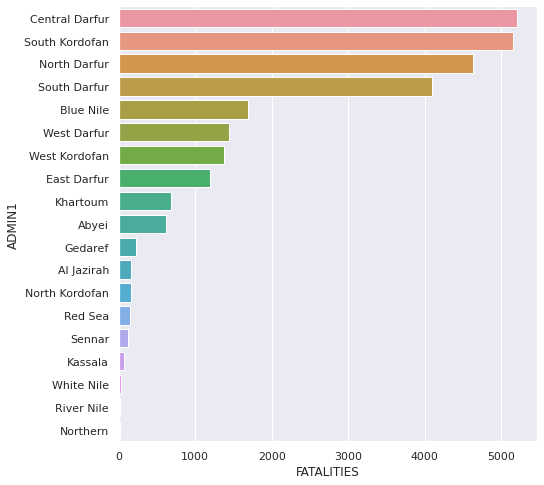

In [ ]:
sns.barplot(x='FATALITIES', y= 'ADMIN1', order = agg_fatal.sort_values(by='FATALITIES', ascending = False)['ADMIN1'], data=agg_fatal)

Visualize the number of events by ADMIN1 over time.

In [ ]:
# Aggregate the number of events by 'ADMIN1' and 'YEAR'

admin1_year = df.groupby(['ADMIN1','YEAR']) \
       .agg({'EVENT_ID_CNTY':'size', 'LONGITUDE':'mean', 'LATITUDE':'mean'}) \
       .reset_index()


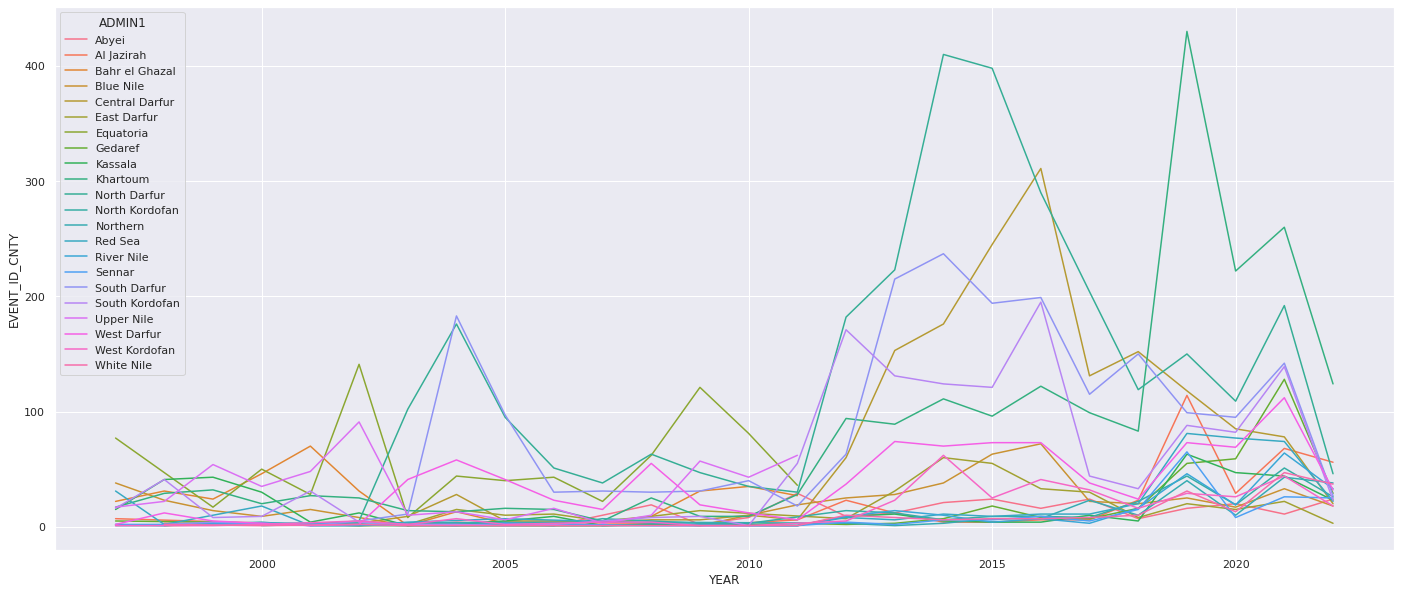

In [ ]:
sns.set(rc={'figure.figsize':(24,10)})
sns.lineplot(data=admin1_year, x='YEAR', y='EVENT_ID_CNTY', hue = 'ADMIN1')

Creat a bottom to allow a user to select a region.

In [ ]:
buttons = []
i = 0
fig = go.Figure()
admin1_list = list(df['ADMIN1'].unique())
for region in admin1_list:
    fig.add_trace(
        go.Scatter(
            x = admin1_year['YEAR'][admin1_year['ADMIN1']==region],
            y = admin1_year['EVENT_ID_CNTY'][admin1_year['ADMIN1']==region],
            name = region, visible = (i==0)
        )
    )
    
for region in admin1_list:
    args = [False] * len(admin1_list)
    args[i] = True
    
    #create a button object for the country we are on
    button = dict(label = region,
                  method = "update",
                  args=[{"visible": args}])
    
    #add the button to our list of buttons
    buttons.append(button)
    
    #i is an iterable used to tell our "args" list which value to set to True
    i+=1
    
fig.update_layout(updatemenus=[dict(active=0,
                                    type="dropdown",
                                    buttons=buttons,
                                    x = 0,
                                    y = 1.1,
                                    xanchor = 'left',
                                    yanchor = 'bottom'),
                              ])
fig.update_layout(
    autosize=False,
    width=1000,
    height=600,)

### Map

Use a module *Geopanda* to map using LONGITUDE and LATITUDE columns in the dataset.

Load Sudan's and South Sudan's region boundary data from [here](https://data.humdata.org/dataset/cod-ab-sdn) and [here](https://data.humdata.org/dataset/cod-ab-ssd). (shape object) You first need to create two folders, "geodata_sdn" and "geodata_ssd", and upload all the files. And then select two .shp file from each folder that contain region data. 

Sudan's region data is contained in "**sdn_admbnda_adm2_cbs_nic_ssa_20200831.shp**" and South Sudan's data is contained in "**ssd_admbnda_adm1_imwg_nbs_20210924.shp**"

Change the path to each file below accordingly.
(In this analysis, we focus on only Sudan after the independence of South Sudan and do not consider South Sudan.

In [ ]:
sdn_boundary_path = "/content/geodata_sdn/sdn_admbnda_adm1_cbs_nic_ssa_20200831.shp"
#ssd_boundary_path = '/content/geodata_ssd/ssd_admbnda_adm1_imwg_nbs_20210924.shp'

Import the region data of Sudan (sdn_boundary) and that of South Sudan(ssd_boundary).

In [ ]:
sdn_boundary = gpd.read_file(sdn_boundary_path)
#ssd_boundary = gpd.read_file(ssd_boundary_path)

Merge the two geographical data.

In [ ]:
sdn = gpd.GeoDataFrame(sdn_boundary)

Plot all the events in Sudan.

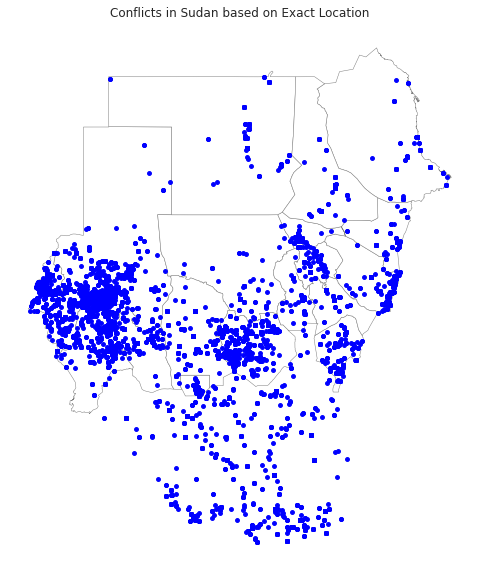

In [ ]:
# Plot Sudan's boundary
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_aspect('equal')
sdn.plot(ax=ax, color='white', edgecolor='0.5',linewidth=0.5)

# Plot all the events over the map based on given longitude and latitude
geometry = [Point(xy) for xy in zip(df['LONGITUDE'], df['LATITUDE'])]
gdf_df = GeoDataFrame(df, geometry=geometry) 
gdf_df.plot(ax=ax, marker='o', color='blue', markersize=15);

ax.set_title('Conflicts in Sudan based on Exact Location')
ax.axis('off')
plt.show()

Aggregate the number of reports by 'ADMIN1'

In [ ]:
# Aggregate the number of events by 'ADMIN1'

admin1 = df.groupby('ADMIN1') \
       .agg({'EVENT_ID_CNTY':'size', 'LONGITUDE':'mean', 'LATITUDE':'mean'}) \
       .reset_index()


In [ ]:
admin1.head(10)

,ADMIN1,EVENT_ID_CNTY,LONGITUDE,LATITUDE
0,Abyei,253,28.467126,9.589403
1,Al Jazirah,372,33.358871,14.470828
2,Bahr el Ghazal,351,28.150236,7.964288
3,Blue Nile,492,34.239795,11.322354
4,Central Darfur,1612,23.787618,12.774024
5,East Darfur,350,26.125223,11.617911
6,Equatoria,817,31.140705,4.606938
7,Gedaref,349,35.660822,13.787430
8,Kassala,389,36.332149,15.425262
9,Khartoum,2014,32.525141,15.586803


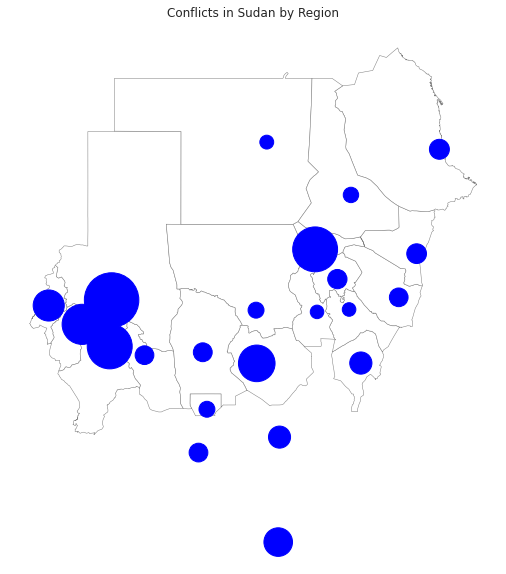

In [ ]:
# Plot Sudan's boundary
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_aspect('equal')
sdn.plot(ax=ax, color='white', edgecolor='0.5',linewidth=0.5)

# Plot the events on map. The size represents the number of events
geometry = [Point(xy) for xy in zip(admin1['LONGITUDE'], admin1['LATITUDE'])]
gdf_admin1 = GeoDataFrame(admin1, geometry=geometry) 
gdf_admin1.plot(ax=ax, marker='o', color='blue', markersize=admin1['EVENT_ID_CNTY']);

ax.set_title('Conflicts in Sudan by Region')
ax.axis('off')
plt.show()

Repeat the same for 'ADMIN2' - sub-region under state.

In [ ]:
# Aggregate the number of events by 'ADMIN2'

admin2 = df.groupby('ADMIN2') \
       .agg({'EVENT_ID_CNTY':'size', 'LONGITUDE':'mean', 'LATITUDE':'mean'}) \
       .reset_index()


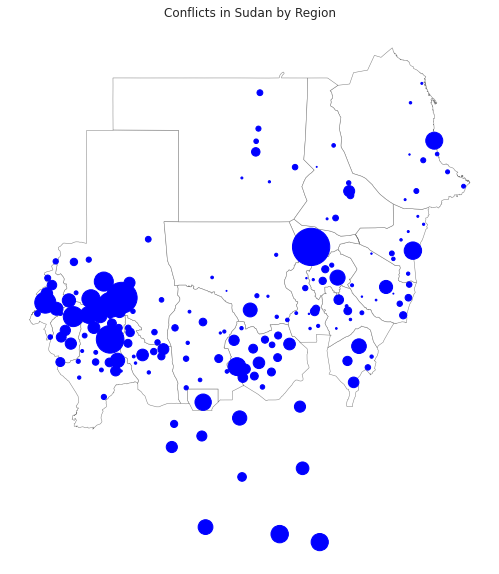

In [ ]:
# Plot Sudan's boundary
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_aspect('equal')
sdn.plot(ax=ax, color='white', edgecolor='0.5',linewidth=0.5)

# Plot the events on map. The size represents the number of events
geometry = [Point(xy) for xy in zip(admin2['LONGITUDE'], admin2['LATITUDE'])]
gdf_admin2 = GeoDataFrame(admin2, geometry=geometry) 
gdf_admin2.plot(ax=ax, marker='o', color='blue', markersize=admin2['EVENT_ID_CNTY']);

ax.set_title('Conflicts in Sudan by Region')
ax.axis('off')
plt.show()

Repeat the same for 'LOCATION' which shows more specific location of each event.

In [ ]:
# Aggregate the number of events by 'LOCATION'

location = df.groupby('LOCATION') \
       .agg({'EVENT_ID_CNTY':'size', 'LONGITUDE':'mean', 'LATITUDE':'mean'}) \
       .reset_index()


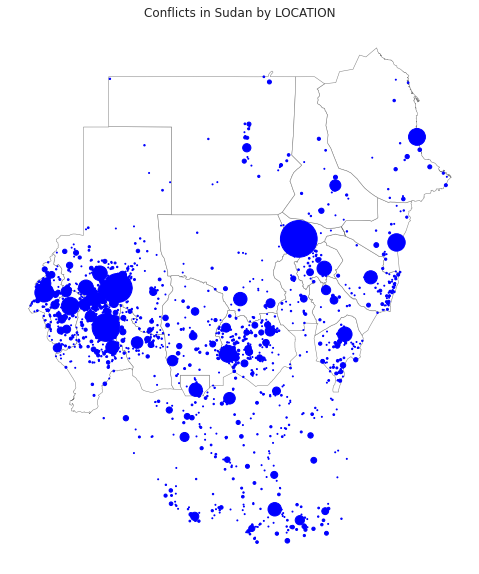

In [ ]:
# Plot Sudan's boundary
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_aspect('equal')
sdn.plot(ax=ax, color='white', edgecolor='0.5',linewidth=0.5)

# Plot the events on map. The size represents the number of events
geometry = [Point(xy) for xy in zip(location['LONGITUDE'], location['LATITUDE'])]
gdf_location = GeoDataFrame(location, geometry=geometry) 
gdf_location.plot(ax=ax, marker='o', color='blue', markersize=location['EVENT_ID_CNTY']);

ax.set_title('Conflicts in Sudan by LOCATION')
ax.axis('off')
plt.show()

Heatmap by 'ADMIN2' 

In [ ]:
#geo_location_count = gpd.GeoDataFrame(df.groupby('ADMIN2').count()['EVENT_ID_CNTY'])
#geo_location_count.columns = ['counts']

##merged_sdn = geo_location_count.join(sdn.set_index('ADM2_EN'))

#fig = plt.figure(figsize=(10,6))
#ax = fig.add_subplot(111)
#ax.set_aspect('equal')
#sdn.plot(ax=ax, color='white', edgecolor='0.8',linewidth=0.5)
#merged_sdn.plot(column='counts', cmap='OrRd', linewidth=0.8, legend=True, ax=ax, edgecolor='0.8')
#ax.set_title('Conflicts per state')
#ax.axis('off')
#plt.show()

I tried to create a heatmap of the number of events by state ('ADMIN2') but it was not successful...

### After 2011

Filter data after South Sudan became indepedent in 2011.

In [ ]:
df_2 = df[df['EVENT_DATE']>='2011-07-10']

In [ ]:
sdn = gpd.GeoDataFrame(sdn_boundary)

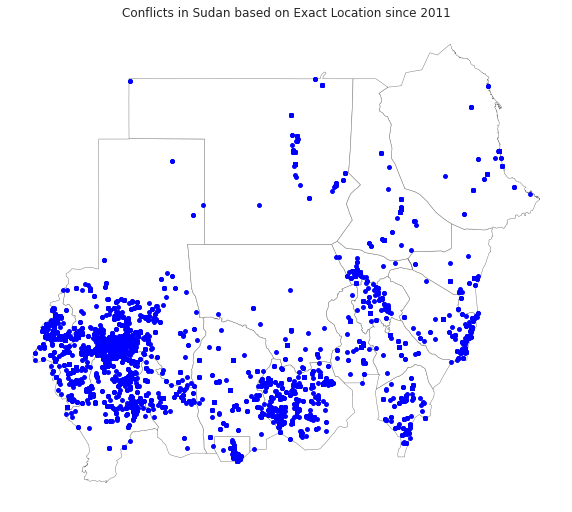

In [ ]:
# Plot Sudan's boundary
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_aspect('equal')
sdn.plot(ax=ax, color='white', edgecolor='0.5',linewidth=0.5)

# Plot all the events over the map based on given longitude and latitude
geometry = [Point(xy) for xy in zip(df_2['LONGITUDE'], df_2['LATITUDE'])]
gdf_df = GeoDataFrame(df_2, geometry=geometry) 
gdf_df.plot(ax=ax, marker='o', color='blue', markersize=15);

ax.set_title('Conflicts in Sudan based on Exact Location since 2011')
ax.axis('off')
plt.show()

In [ ]:
# Aggregate the number of events by 'ADMIN1'

admin1 = df_2.groupby(['ADMIN1']) \
       .agg({'EVENT_ID_CNTY':'size', 'LONGITUDE':'mean', 'LATITUDE':'mean'}) \
       .reset_index()


[Text(0, 0.5, 'State'),
 Text(0.5, 1.0, 'Number of Conflicts by Region since 2011')]

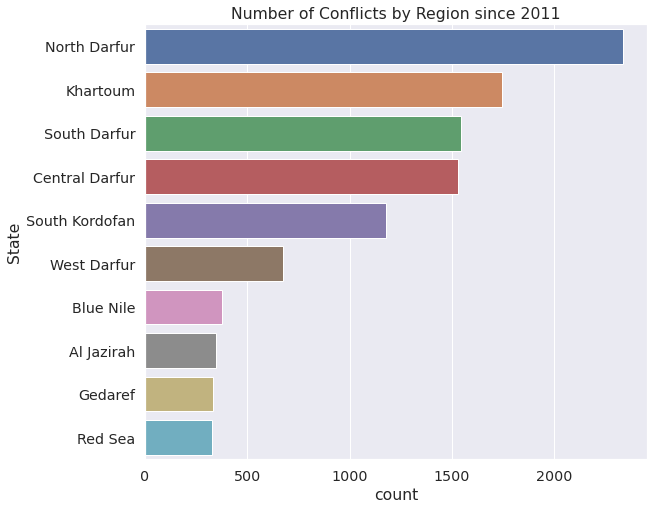

In [ ]:
sns.set(rc={'figure.figsize':(9,8)})
sns.set(font_scale = 1.3)
sns.countplot(y='ADMIN1', data=df_2, order=df_2['ADMIN1'].value_counts().iloc[:10].index)\
.set(title='Number of Conflicts by Region since 2011', ylabel = 'State')

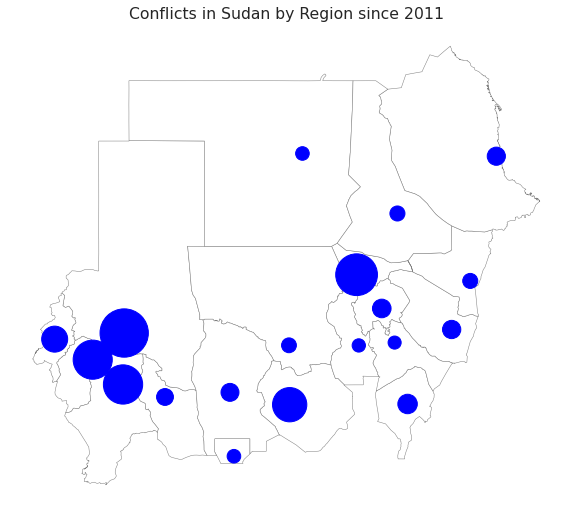

In [ ]:
# Plot Sudan's boundary
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_aspect('equal')
sdn.plot(ax=ax, color='white', edgecolor='0.5',linewidth=0.5)

# Plot the events on map. The size represents the number of events
geometry = [Point(xy) for xy in zip(admin1['LONGITUDE'], admin1['LATITUDE'])]
gdf_admin1 = GeoDataFrame(admin1, geometry=geometry) 
gdf_admin1.plot(ax=ax, marker='o', color='blue', markersize=admin1['EVENT_ID_CNTY']);


ax.set_title('Conflicts in Sudan by Region since 2011')
ax.axis('off')
plt.show()

Darfur states in the West and the capital city Khartoum have large cases.

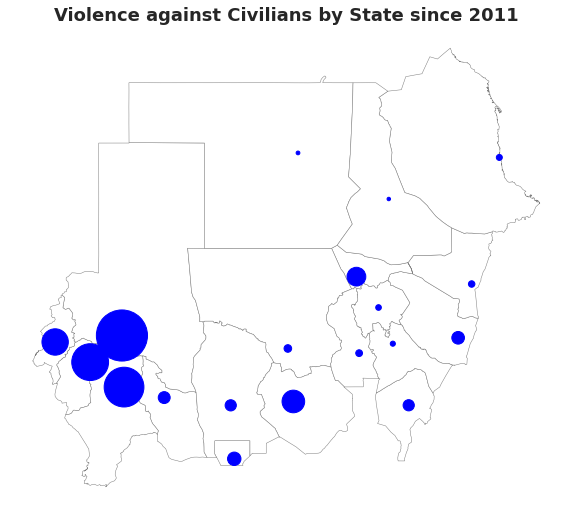

In [ ]:
# Aggregate the number of events by 'ADMIN1'

viol_ag_civ = df_2.loc[df_2['EVENT_TYPE']=='Violence against civilians'].groupby('ADMIN1') \
       .agg({'EVENT_ID_CNTY':'size', 'LONGITUDE':'mean', 'LATITUDE':'mean'}) \
       .reset_index()


# Plot Sudan's boundary
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_aspect('equal')
sdn.plot(ax=ax, color='white', edgecolor='0.5',linewidth=0.5)

# Plot the events on map. The size represents the number of events
geometry = [Point(xy) for xy in zip(viol_ag_civ['LONGITUDE'], viol_ag_civ['LATITUDE'])]
gdf_viol_ag_civ = GeoDataFrame(viol_ag_civ, geometry=geometry) 
gdf_viol_ag_civ.plot(ax=ax, marker='o', color='blue', markersize=viol_ag_civ['EVENT_ID_CNTY']*2);


ax.set_title('Violence against Civilians by State since 2011', fontsize = 18, weight = 'bold')

ax.axis('off')
plt.show()

Darfur states in the West have large cases for Violence against Civilians but Khartoum has relatively small cases.

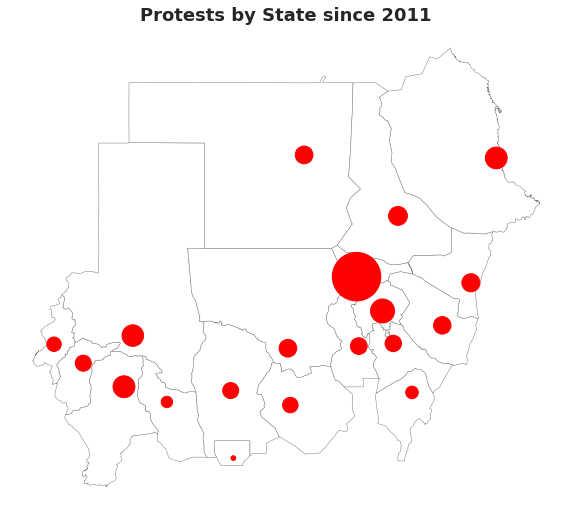

In [ ]:
# Aggregate the number of events by 'ADMIN1'

viol_ag_civ = df_2.loc[df_2['EVENT_TYPE']=='Protests'].groupby('ADMIN1') \
       .agg({'EVENT_ID_CNTY':'size', 'LONGITUDE':'mean', 'LATITUDE':'mean'}) \
       .reset_index()


# Plot Sudan's boundary
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.set_aspect('equal')
sdn.plot(ax=ax, color='white', edgecolor='0.5',linewidth=0.5)

# Plot the events on map. The size represents the number of events
geometry = [Point(xy) for xy in zip(viol_ag_civ['LONGITUDE'], viol_ag_civ['LATITUDE'])]
gdf_viol_ag_civ = GeoDataFrame(viol_ag_civ, geometry=geometry) 
gdf_viol_ag_civ.plot(ax=ax, marker='o', color='Red', markersize=viol_ag_civ['EVENT_ID_CNTY']*2);


ax.set_title('Protests by State since 2011', fontsize = 18, weight = 'bold')
ax.axis('off')
plt.show()

The case size is equal across all states except the capital city Khartoum for Protests. 

Now create a heat map showing the number of cases and fatalities.

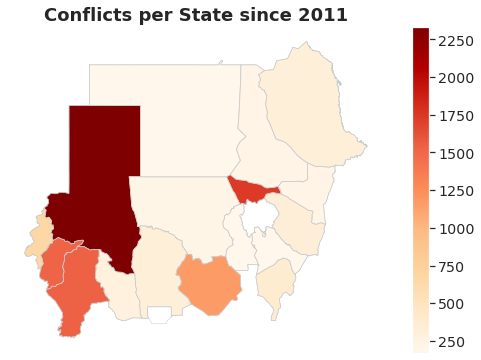

In [ ]:
geo_location_count = gpd.GeoDataFrame(df_2.groupby('ADMIN1').count()['EVENT_ID_CNTY'])
geo_location_count.columns = ['counts']

merged_sdn = geo_location_count.join(sdn.set_index('ADM1_EN'))

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.set_aspect('equal')
sdn.plot(ax=ax, color='white', edgecolor='0.8',linewidth=0.5)
merged_sdn.plot(column='counts', cmap='OrRd', linewidth=0.8, legend=True, ax=ax, edgecolor='0.8')
ax.set_title('Conflicts per State since 2011', fontsize = 18, weight = 'bold')
ax.axis('off')
plt.show()


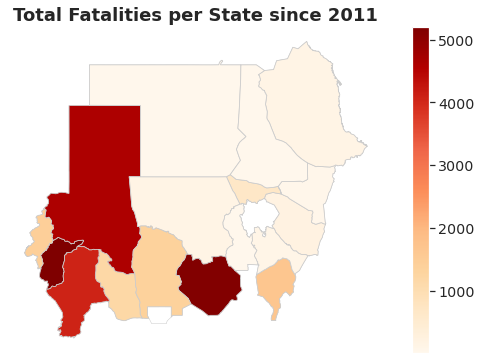

In [ ]:
geo_location_fatalities = gpd.GeoDataFrame(df_2.groupby('ADMIN1').sum('FATALITIES')['FATALITIES'])
geo_location_fatalities.columns = ['fatalities']

merged_sdn = geo_location_fatalities.join(sdn.set_index('ADM1_EN'))

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.set_aspect('equal')
sdn.plot(ax=ax, color='white', edgecolor='0.8',linewidth=0.5)
merged_sdn.plot(column='fatalities', cmap='OrRd', linewidth=0.8, legend=True, ax=ax, edgecolor='0.8')
ax.set_title('Total Fatalities per State since 2011', fontsize = 18, weight = 'bold')
ax.axis('off')
plt.show()


Now create a stacked bar chart for event type for each state.

In [ ]:
# Aggregate the number of events by state

state_type = df_2.groupby(['ADMIN1', 'EVENT_TYPE']) \
       .agg({'EVENT_ID_CNTY':'size', 'FATALITIES': 'sum'}) \
       .reset_index()


In [ ]:
state_type['Battles'] = state_type[state_type['EVENT_TYPE']=='Battles'].groupby(['ADMIN1','EVENT_TYPE'])['EVENT_ID_CNTY'].transform(np.sum)
state_type['Explosions/Remote violence'] = state_type[state_type['EVENT_TYPE']=='Explosions/Remote violence'].groupby(['ADMIN1','EVENT_TYPE'])['EVENT_ID_CNTY'].transform(np.sum)
state_type['Protests'] = state_type[state_type['EVENT_TYPE']=='Protests'].groupby(['ADMIN1','EVENT_TYPE'])['EVENT_ID_CNTY'].transform(np.sum)
state_type['Riots'] = state_type[state_type['EVENT_TYPE']=='Riots'].groupby(['ADMIN1','EVENT_TYPE'])['EVENT_ID_CNTY'].transform(np.sum)
state_type['Strategic developments'] = state_type[state_type['EVENT_TYPE']=='Strategic developments'].groupby(['ADMIN1','EVENT_TYPE'])['EVENT_ID_CNTY'].transform(np.sum)
state_type['Violence against civilians'] = state_type[state_type['EVENT_TYPE']=='Violence against civilians'].groupby(['ADMIN1','EVENT_TYPE'])['EVENT_ID_CNTY'].transform(np.sum)
state_type.fillna(0)
state_type_agg = state_type[['ADMIN1','Battles','Explosions/Remote violence','Protests','Riots','Strategic developments','Violence against civilians']] \
.groupby('ADMIN1') \
.agg({'Battles': 'sum', 'Explosions/Remote violence': 'sum', 'Protests': 'sum', 'Riots': 'sum', 'Strategic developments': 'sum', 'Violence against civilians': 'sum',})

In [ ]:
state_type_agg2 = state_type_agg.div(state_type_agg.sum(axis=1), axis=0)*100

In [ ]:
top10 = ['North Darfur', 'Khartoum', 'South Darfur', 'Central Darfur',
       'South Kordofan', 'West Darfur', 'Blue Nile', 'Al Jazirah', 'Gedaref',
       'Red Sea']
state_type_agg3 = state_type_agg2.loc[top10].sort_values(by='Battles')

<Figure size 400x480 with 0 Axes>

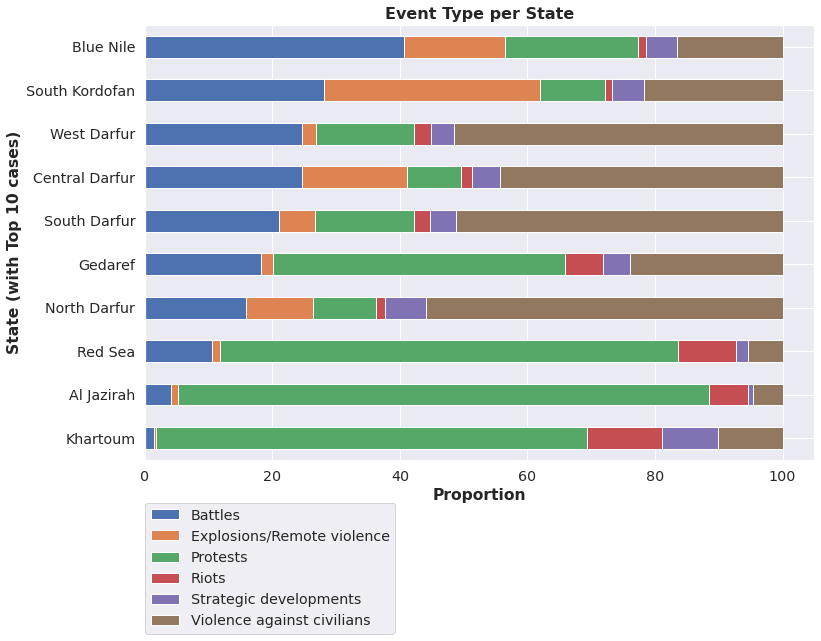

In [ ]:
plt.rcParams["figure.figsize"] = (12, 8)
figure(figsize=(5, 6), dpi=80)
state_type_agg3.plot(kind = 'barh', stacked='True')
plt.legend(loc=(0.0,-0.40))
plt.title('Event Type per State', fontsize = 16, weight = 'bold')
plt.xlabel('Proportion', weight = 'bold')
plt.ylabel('State (with Top 10 cases)', weight = 'bold')
plt.show()


For Red Sea, Al Jazirah, and Khartoum, Protest take up the majority, while Blue Nile and Darfur states have a large proportion for Battles and Violence against Civilians.

In [ ]:
state_type = state_type.set_index('ADMIN1')
state_type

state_type2 = state_type.groupby(['ADMIN1', 'EVENT_TYPE']) \
       .agg({'EVENT_ID_CNTY':'size', 'FATALITIES': 'sum'}) \
       .reset_index()

### Cases and Fatalities by Year - Cumulative Interactive

Create an interactive graph for cases and fatalities in each state using time series.

In [ ]:
# Aggregate the number of events by 'ADMIN1'

case_fatal_year = df_2.groupby(['ADMIN1', 'YEAR']) \
       .agg({'EVENT_ID_CNTY':'size', 'FATALITIES': 'sum'}) \
       .reset_index()

In [ ]:
case_fatal_year["cum_case"] = case_fatal_year[['ADMIN1', 'EVENT_ID_CNTY']].groupby('ADMIN1').cumsum()
case_fatal_year["cum_fatal"] = case_fatal_year[['ADMIN1', 'FATALITIES']].groupby('ADMIN1').cumsum()

In [ ]:
fig = px.bar(case_fatal_year, y="ADMIN1", x="cum_case", color="ADMIN1", orientation='h',
  animation_frame="YEAR", animation_group="ADMIN1", range_x=[0,2500],
  title = 'Cumulative Cases by State since 2011',
  labels={'ADMIN1': 'State', 'cum_case':'Cumulative Cases'})
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()


In [ ]:
fig = px.bar(case_fatal_year, y="ADMIN1", x="cum_fatal", color="ADMIN1",orientation='h',
  animation_frame="YEAR", animation_group="ADMIN1", range_x=[0,6000],
  title = 'Cumulative Fatalities by State since 2011',
  labels={'ADMIN1': 'State', 'cum_fatal':'Cumulative Fatalities'})
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

In [ ]:
case_fatal_year2 = case_fatal_year.merge(admin1, on='ADMIN1', how='left')

### Blue Nile and South Darfur regions for the past year

We focus on the data for the past year. We also compare ten states with the highest cases, which are

* North Darfur
* Khartoum
* South Darfur
* Central Darfur
* South Kordofan
* West Darfur
* Blue Nile
* Al Jazirah
* Gedaref
* Red Sea



In [ ]:
df_3 = df[(df['EVENT_DATE'] >= '2021-04-01') & (df['ADMIN1'].isin(top10))]
df_3['EVENT_DATE'] = pd.to_datetime(df['EVENT_DATE'])
df_3['MONTH'] = df_3['EVENT_DATE'].dt.to_period('M')
df_3['MONTH'] = df_3['MONTH'].dt.strftime('%Y/%m')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:
# Aggregate the number of events by state and month

agg_3 = df_3.groupby(['ADMIN1','MONTH']) \
       .agg({'EVENT_ID_CNTY':'size', 'FATALITIES': 'sum', 'LONGITUDE':'mean', 'LATITUDE':'mean'}) \
       .reset_index()


[Text(0.5, 1.0, 'Number of Conflicts by Region over the past year')]

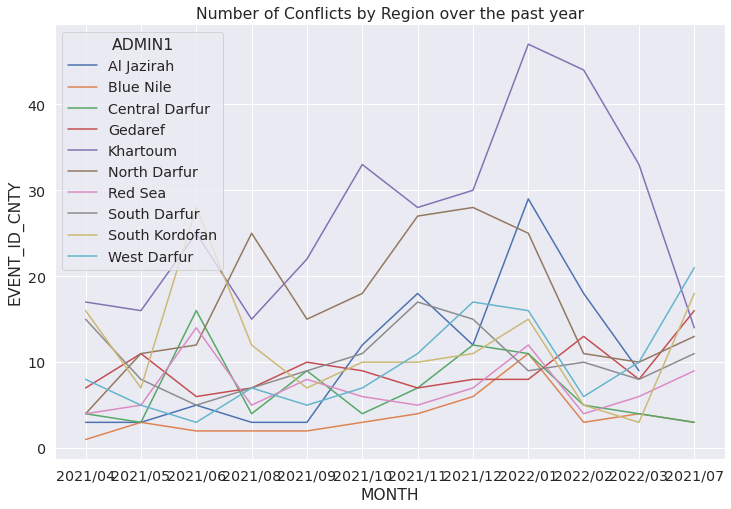

In [ ]:
sns.lineplot(data=agg_3, x='MONTH', y='EVENT_ID_CNTY', hue='ADMIN1').set(title='Number of Conflicts by Region over the past year')

In [ ]:
top10_agg = df_3.groupby(['ADMIN1']) \
       .agg({'EVENT_ID_CNTY':'size', 'FATALITIES': 'sum'}) \
       .reset_index()

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'State'),
 Text(0.5, 1.0, 'Number of Conflicts by Region since April 2021')]

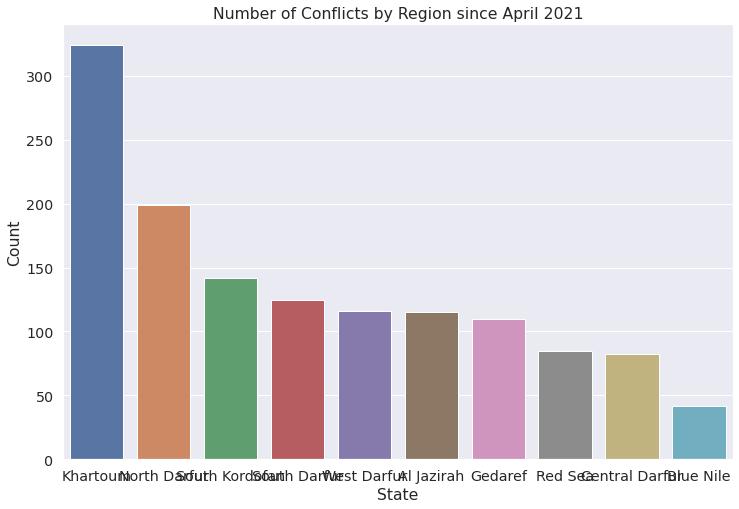

In [ ]:
sns.barplot(data=top10_agg, x='ADMIN1', y='EVENT_ID_CNTY', order = df_3['ADMIN1'].value_counts().iloc[:10].index).\
set(title='Number of Conflicts by Region since April 2021', xlabel='State', ylabel='Count')

In [ ]:
top10_agg.sort_values(by='FATALITIES', ascending = False).set_index('ADMIN1').index

Index(['West Darfur', 'South Kordofan', 'North Darfur', 'South Darfur',
       'Khartoum', 'Gedaref', 'Central Darfur', 'Red Sea', 'Blue Nile',
       'Al Jazirah'],
      dtype='object', name='ADMIN1')

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'State'),
 Text(0.5, 1.0, 'Fatalities by Region since April 2021')]

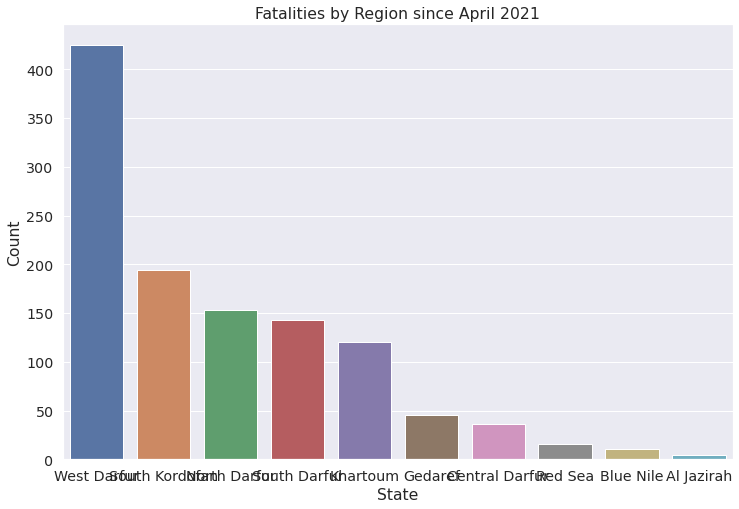

In [ ]:
sns.barplot(data=top10_agg, x='ADMIN1', y='FATALITIES', order=top10_agg.sort_values(by='FATALITIES', ascending = False).set_index('ADMIN1').index)\
.set(title='Fatalities by Region since April 2021', xlabel='State', ylabel='Count')

In [ ]:
df_4 = df_3[(df_3['ADMIN1']=='South Darfur') | (df_3['ADMIN1']=='Blue Nile')]

In [ ]:
# Aggregate the number of events by state and month

bn_sd = df_4.groupby(['ADMIN1','MONTH']) \
       .agg({'EVENT_ID_CNTY':'size', 'FATALITIES': 'sum', 'LONGITUDE':'mean', 'LATITUDE':'mean'}) \
       .reset_index()


[Text(0.5, 1.0, 'Number of Conflicts by Region over the past year')]

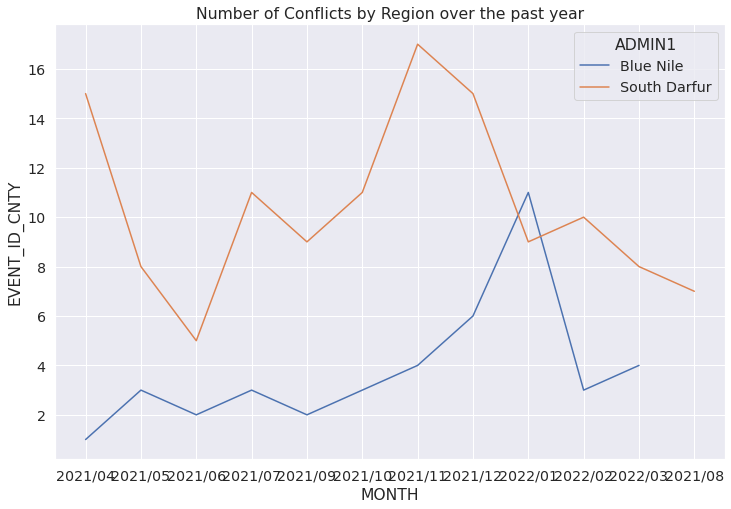

In [ ]:
sns.lineplot(data=bn_sd, x='MONTH', y='EVENT_ID_CNTY', hue='ADMIN1').set(title='Number of Conflicts by Region over the past year')

[Text(0.5, 1.0, 'Fatalities by Region over the past year')]

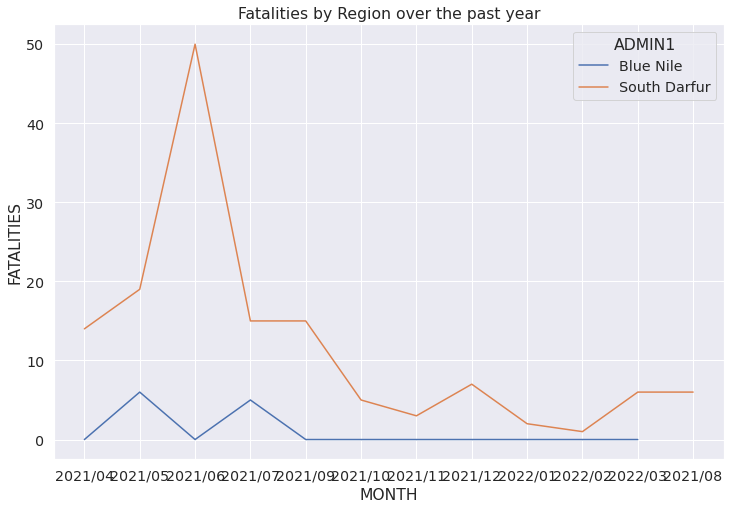

In [ ]:
sns.lineplot(data=bn_sd, x='MONTH', y='FATALITIES', hue='ADMIN1').set(title='Fatalities by Region over the past year')

In [ ]:
case_fatal = df_2.groupby(['ADMIN1']) \
       .agg({'EVENT_ID_CNTY':'size', 'FATALITIES': 'sum'}) \
       .reset_index()

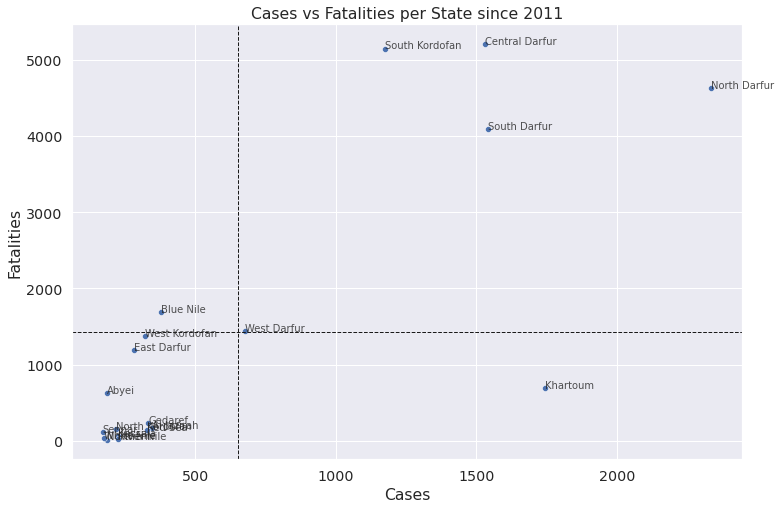

In [ ]:
#plt.figure(figsize=(20,20))

#Scatterplot
sns.scatterplot(data=case_fatal, x='EVENT_ID_CNTY', y='FATALITIES')

#Title 
plt.title("Cases vs Fatalities per State since 2011")

# x and y axis labels
plt.xlabel('Cases')
plt.ylabel('Fatalities')

#Country names
for i in range(case_fatal.shape[0]):
          plt.text(case_fatal.EVENT_ID_CNTY[i], y=case_fatal.FATALITIES[i], s=case_fatal.ADMIN1[i], alpha=0.8, fontsize = 10)

#Quadrant Marker          
#plt.text(x=40000, y=68, s="Q4",alpha=0.7,fontsize=14, color='b')
#plt.text(x=15000, y=68, s="Q3",alpha=0.7,fontsize=14, color='b')
#plt.text(x=15000, y=78, s="Q2", alpha=0.7,fontsize=14, color='b')
#plt.text(x=40000, y=78, s="Q1", alpha=0.7,fontsize=14, color='b')          

# Benchmark Mean values          
plt.axhline(y=case_fatal.FATALITIES.mean(), color='k', linestyle='--', linewidth=1)           
plt.axvline(x=case_fatal.EVENT_ID_CNTY.mean(), color='k',linestyle='--', linewidth=1) 
          
plt.show()

In [ ]:
case_fatal['log_case'] = np.log(case_fatal['EVENT_ID_CNTY'])
case_fatal['log_fatalities'] = np.log(case_fatal['FATALITIES'])

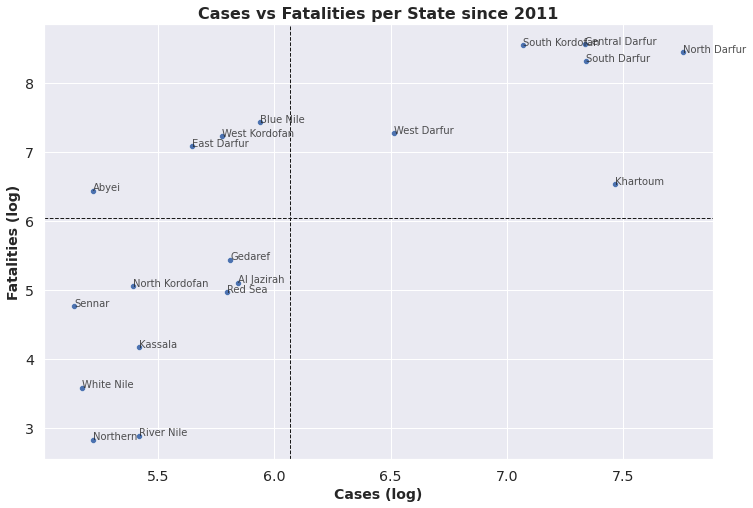

In [ ]:
#plt.figure(figsize=(20,20))

#Scatterplot
sns.scatterplot(data=case_fatal, x='log_case', y='log_fatalities')

plt.xlabel('Cases (log)', weight = 'bold', fontsize = 14)
plt.ylabel('Fatalities (log)', weight = 'bold', fontsize = 14)
plt.title("Cases vs Fatalities per State since 2011", fontsize=16, weight = 'bold')



#Country names
for i in range(case_fatal.shape[0]):
          plt.text(case_fatal.log_case[i], y=case_fatal.log_fatalities[i], s=case_fatal.ADMIN1[i], alpha=0.8, fontsize = 10)

#Quadrant Marker          
#plt.text(x=40000, y=68, s="Q4",alpha=0.7,fontsize=14, color='b')
#plt.text(x=15000, y=68, s="Q3",alpha=0.7,fontsize=14, color='b')
#plt.text(x=15000, y=78, s="Q2", alpha=0.7,fontsize=14, color='b')
#plt.text(x=40000, y=78, s="Q1", alpha=0.7,fontsize=14, color='b')          

# Benchmark Mean values          
plt.axhline(y=case_fatal.log_fatalities.mean(), color='k', linestyle='--', linewidth=1)           
plt.axvline(x=case_fatal.log_case.mean(), color='k',linestyle='--', linewidth=1) 
          
plt.show()

North Darfur, Central Darfur, South Darfur, and South Kordofan have the highest risk. East Darfur, Blue Nile, and West Kordofan have a similar risk together and it is relatively high. 

[Text(0.5, 1.0, 'Number of Conflicts by State over the past year')]

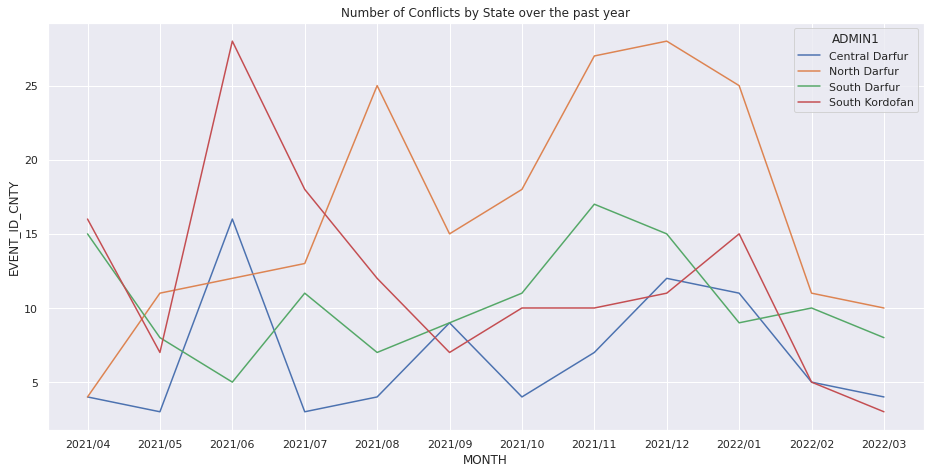

In [ ]:
sns.set(rc={'figure.figsize':(15.7,7.5)})
state_list = ['North Darfur','South Darfur','Central Darfur', 'South Kordofan']

sns.lineplot(data=agg_3.loc[agg_3['ADMIN1'].isin(state_list)], \
             x='MONTH', y='EVENT_ID_CNTY', hue='ADMIN1').set(title='Number of Conflicts by State over the past year')

[Text(0.5, 1.0, 'Number of Fatalities by State over the past year')]

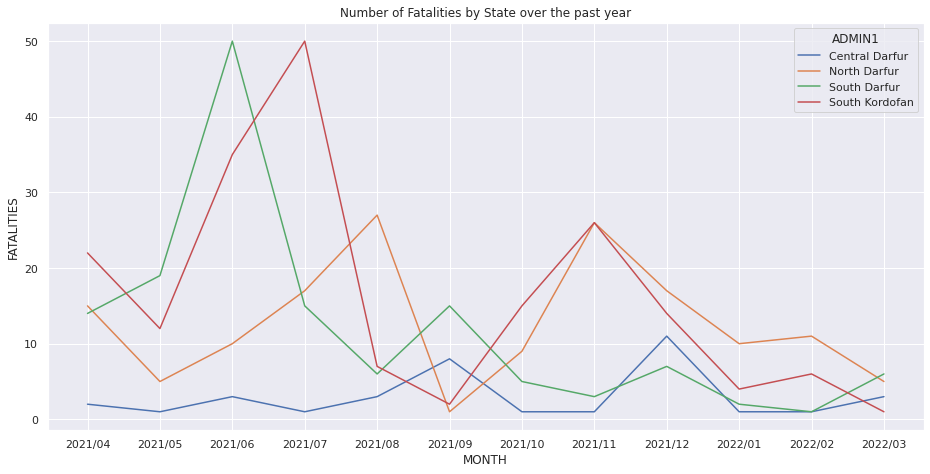

In [ ]:

sns.lineplot(data=agg_3.loc[agg_3['ADMIN1'].isin(state_list)], \
             x='MONTH', y='FATALITIES', hue='ADMIN1').set(title='Number of Fatalities by State over the past year')